# NCSU GIS 582: Geospatial Modeling and Analysis

## 7B: Hydrologic and Erosion modeling


## Install GRASS GIS

In [31]:
%%bash

apt-get install grass grass-dev grass-doc
# leave the directory with source code
cd ~

# download sample data
mkdir -p grassdata
curl -SL https://grass.osgeo.org/sampledata/north_carolina/nc_spm_08_grass7.zip > nc_spm_08_grass7.zip
unzip -qq nc_spm_08_grass7.zip
mv nc_spm_08_grass7 grassdata
rm nc_spm_08_grass7.zip

Reading package lists...
Building dependency tree...
Reading state information...
grass is already the newest version (8.3.1-1~jammy1).
grass-dev is already the newest version (8.3.1-1~jammy1).
grass-doc is already the newest version (8.3.1-1~jammy1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  140M  100  140M    0     0  43.7M      0  0:00:03  0:00:03 --:--:-- 43.7M
mv: cannot move 'nc_spm_08_grass7' to 'grassdata/nc_spm_08_grass7': Directory not empty


Download Inputs

In [32]:
%%bash

# Make input directory and download inputs data
mkdir -p inputs

BASE_DOWNLOAD_URL=https://raw.githubusercontent.com/ncsu-geoforall-lab/GIS582-assignments/main/7AB%20-%20Flow%20Modeling/inputs/
FILENAMES="cfac_color,cfac_rules,erdep_class,erdep_color,erdep_label,land_to_mannings,land_to_rain,lu_labels,outlet_point,soilloss_color"

# Convert the comma-separated string to an array
IFS=',' read -r -a filename_array <<< "$FILENAMES"

# Loop through each URL in the array
for filename in "${filename_array[@]}"
do
    echo "Downloading: $filename"
    # Use curl to download each file
    # The '-O' option saves the file with its original name
    curl $BASE_DOWNLOAD_URL${filename}.txt --output ./inputs/${filename}.txt || echo "Failed to download: $url"
done

echo "Download completed."

Downloading: cfac_color
Downloading: cfac_rules
Downloading: erdep_class
Downloading: erdep_color
Downloading: erdep_label
Downloading: land_to_mannings
Downloading: land_to_rain
Downloading: lu_labels
Downloading: outlet_point
Downloading: soilloss_color
Download completed.


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    57  100    57    0     0    292      0 --:--:-- --:--:-- --:--:--   293
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   147  100   147    0     0    858      0 --:--:-- --:--:-- --:--:--   859
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   107  100   107    0     0    348      0 --:--:-- --:--:-- --:--:--   348
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   172  100   172    0     0    781      0 --:--:-- --:--:-- --:--:--   785
  % Total    % Received % Xferd  Average Speed   Tim

Create the output direcotry to save your maps.

In [33]:
%%bash
mkdir -p output

## Start GRASS GIS

Create a new mapset to run your analysis.

In [ ]:
%%bash

grass -c -e ~/grassdata/nc_spm_08_grass7/HW_7B_Flow_Modeling

In [37]:
import subprocess
import sys

# Ask GRASS GIS where its Python packages are.
# FOR WINDOWS:
# grass_call = "grass80"
# shell_setting = True
# FOR MAC/LINUX
grass_call = "grass"
shell_setting = False

sys.path.append(
    subprocess.check_output([grass_call, "--config", "python_path"], text=True, shell=shell_setting).strip()
)

# Import GRASS packages
import grass.script as gs
import grass.jupyter as gj

# Start GRASS Session
gj.init("~/grassdata", "nc_spm_08_grass7", "HW_7B_Flow_Modeling")

## Compute soil detachment using USLE3D

**Compute topographic potential (LS factor)**

Compare impact of the power function exponents on the erosion pattern.

In [38]:
%%bash

g.region raster=elev_lid792_1m -p
r.slope.aspect elevation=elev_lid792_1m slope=slope_1m aspect=aspect_1m
r.flow elevation=elev_lid792_1m flowaccumulation=flowacc_1m
r.mapcalc "lsfac3d_1m = 1.2 * pow(flowacc_1m * 1./22.1,0.2) * pow(sin(slope_1m)/0.09,1.3)" # eq 1
r.mapcalc "lsfac3d_s1_1m = 1.5 * pow(flowacc_1m * 1./22.1,0.5) * pow(sin(slope_1m)/0.09,1.0)" # eq 2
r.colors lsfac3d_s1_1m color=gyr -e
r.colors lsfac3d_1m raster=lsfac3d_s1_1m

projection: 99 (Lambert Conformal Conic)
zone:       0
datum:      nad83
ellipsoid:  a=6378137 es=0.006694380022900787
north:      220750
south:      220000
west:       638300
east:       639000
nsres:      1
ewres:      1
rows:       750
cols:       700
cells:      525000


   0%   3%   6%   9%  12%  15%  18%  21%  24%  27%  30%  33%  36%  39%  42%  45%  48%  51%  54%  57%  60%  63%  66%  69%  72%  75%  78%  81%  84%  87%  90%  93%  96%  99% 100%
Aspect raster map <aspect_1m> complete
Slope raster map <slope_1m> complete
Reading input raster map <elev_lid792_1m>...
   0%   6%  12%  18%  24%  30%  36%  42%  48%  54%  60%  66%  72%  78%  84%  90%  96% 100%
Calculating...
   0%   3%   6%   9%  12%  15%  18%  21%  24%  27%  30%  33%  36%  39%  42%  45%  48%  51%  54%  57%  60%  63%  66%  69%  72%  75%  78%  81%  84%  87%  90%  93%  96%  

<div class="alert alert-block alert-info">

### Question: Which equation represents conditions when contributing area has greater impact and which models stronger influence of slope?

Slope has a stronger influence with equation 1. The exponent value associated with slope is higher in this equation at 1.3, compared to 1.0 in equation 2.

Contributing area has a greater impact in equation 2, with an exponent value of 0.5. This equation has a higher exponent value associated with contributing area, compared to equation 1 with a lower value of 0.2. The higher the exponent value, the larger the output number will be.

Display layers and save outputs

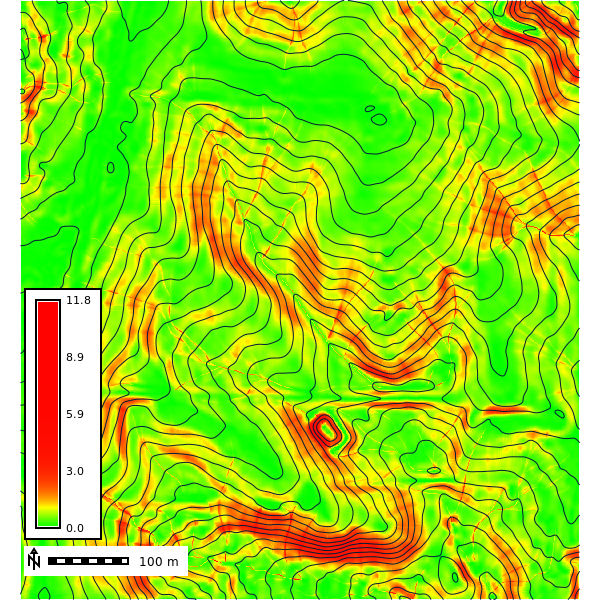

In [39]:
# Create Map instance
lsfac_s13_map = gj.Map(height=600, width=600, use_region=True, filename="output/lsfac_s13.png")

# Add raster layers
lsfac_s13_map.d_rast(map="lsfac3d_1m")


# Add vector layers
lsfac_s13_map.d_vect(map="elev_lid792_cont1m")

# Add map properties
lsfac_s13_map.d_legend(raster="lsfac3d_1m", at="12,50,6,10", flags="b")
lsfac_s13_map.d_barscale(at=[4,9], flags="n")

# Display map
lsfac_s13_map.show()

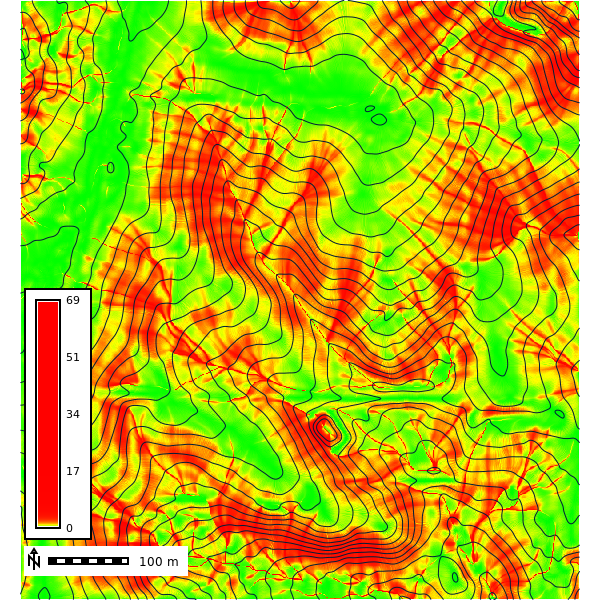

In [40]:
# Create Map instance
lsfac_s10_map = gj.Map(height=600, width=600, use_region=True, filename="output/lsfac_s10.png")

# Add raster layers
lsfac_s10_map.d_rast(map="lsfac3d_s1_1m")


# Add vector layers
lsfac_s10_map.d_vect(map="elev_lid792_cont1m")

# Add map properties
lsfac_s10_map.d_legend(raster="lsfac3d_s1_1m", at="12,50,6,10", flags="b")
lsfac_s10_map.d_barscale(at=[4,9], flags="n")

# Display map
lsfac_s10_map.show()

## Compute soil detachment for spatially variable land cover

Set region to rural area and recode `landcover_1m` to `cfactor` using the r.recode module. Assign special color table and display result.

In [41]:
%%bash

g.region rural_1m -p
r.recode landcover_1m output=cfactor_1m rules=inputs/cfac_rules.txt
r.colors map=cfactor_1m rules=inputs/cfac_color.txt

projection: 99 (Lambert Conformal Conic)
zone:       0
datum:      nad83
ellipsoid:  a=6378137 es=0.006694380022900787
north:      220750
south:      220000
west:       638300
east:       639000
nsres:      1
ewres:      1
rows:       750
cols:       700
cells:      525000


   0%   3%   6%   9%  12%  15%  18%  21%  24%  27%  30%  33%  36%  39%  42%  45%  48%  51%  54%  57%  60%  63%  66%  69%  72%  75%  78%  81%  84%  87%  90%  93%  96%  99% 100%
Color table for raster map <cfactor_1m> set to 'inputs/cfac_color.txt'


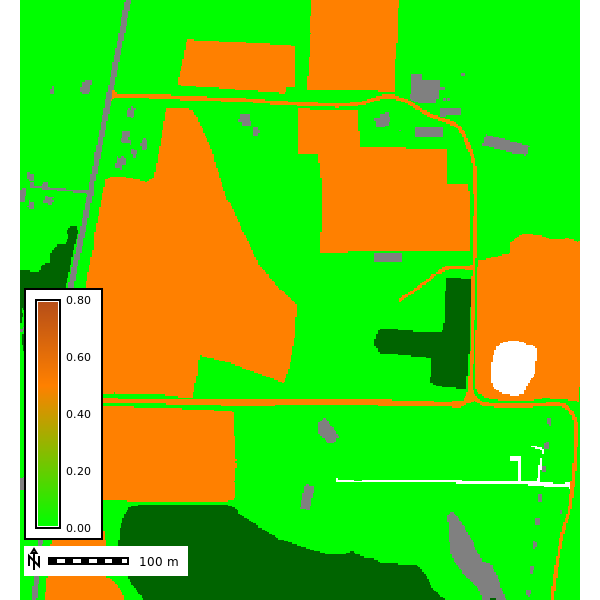

In [42]:
# Create Map instance
cfactor_1m_map = gj.Map(height=600, width=600, use_region=True)

# Add raster layers
cfactor_1m_map.d_rast(map="cfactor_1m")

# Add map properties
cfactor_1m_map.d_legend(raster="cfactor_1m", at="12,50,6,10", flags="b")
cfactor_1m_map.d_barscale(at=[4,9], flags="n")

# Display map
cfactor_1m_map.show()

Compute the USLE3D equation using map algebra, `cfactorbare_1m` is the same as `cfactor_1m`, `cfactorgrow_1m` has landuse recoded for summer conditions.
Specify units of the raster maps using the [r.support](https://grass.osgeo.org/grass83/manuals/r.support.html) module.

In [43]:
%%bash

r.mapcalc "soillossbare_1m = 270. * soils_Kfactor * lsfac3d_1m * cfactorbare_1m"
r.mapcalc "soillossgrow_1m = 270. * soils_Kfactor * lsfac3d_1m * cfactorgrow_1m"
r.colors soillossbare_1m rules=inputs/soilloss_color.txt
r.colors soillossgrow_1m raster=soillossbare_1m
r.support map=soillossbare_1m units="ton/(acre.year)"
r.support map=soillossgrow_1m units="ton/(acre.year)"

Color table for raster map <soillossbare_1m> set to
'inputs/soilloss_color.txt'
Color table for raster map <soillossgrow_1m> set to 'soillossbare_1m'


<div class="alert alert-block alert-info">

### Task: Compare erosion rates and distribution for winter (bare) and summer conditions.

The distribution of soil loss for summer and winter generally occur in different areas. During winter conditions, soil loss is significantly greater and covers more area compared to the soil loss during summer conditions. During winter coniditions, the max erosion rate is higher at 160 than summer with a max value at 116. The total loss of soil is about 4.5 million tons/acre during winter conditions. This is significantly higher than summer conditions, which has a total soil loss of just under 900 thousand tons/acre.

Display the bare soil loss map

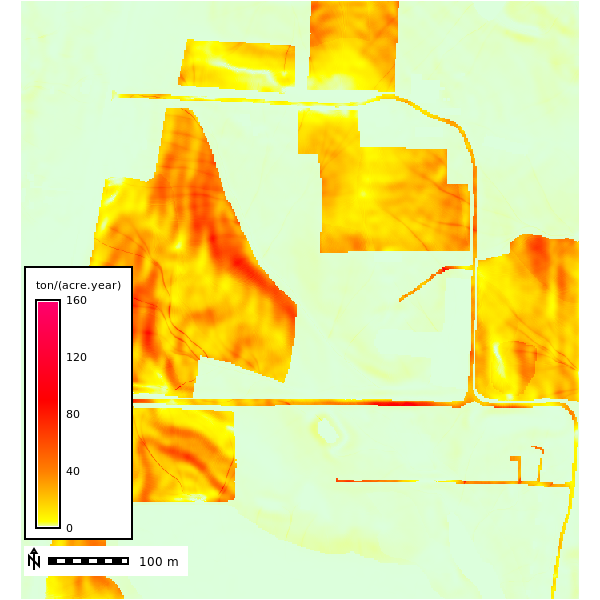

In [44]:
# Create Map instance
soillossbare_map = gj.Map(height=600, width=600, use_region=True, filename="output/soillossbare.png")

# Add raster layers
soillossbare_map.d_rast(map="soillossbare_1m")

# Add map properties
soillossbare_map.d_legend(raster="soillossbare_1m", at="12,50,6,10", flags="b")
soillossbare_map.d_barscale(at=[4,9], flags="n")

# Display map
soillossbare_map.show()

Calculate the univariate statistics.

In [45]:
%%bash
r.univar soillossbare_1m

total null and non-null cells: 525000
total null cells: 2896

Of the non-null cells:
----------------------
n: 522104
minimum: 0
maximum: 160.126
range: 160.126
mean: 8.63552
mean of absolute values: 8.63552
standard deviation: 14.4224
variance: 208.005
variation coefficient: 167.012 %
sum: 4508641.2181171


   2%   5%   8%  11%  14%  17%  20%  23%  26%  29%  32%  35%  38%  41%  44%  47%  50%  53%  56%  59%  62%  65%  68%  71%  74%  77%  80%  83%  86%  89%  92%  95%  98% 100%
 100%


Display the soil loss map during the summer grow season.

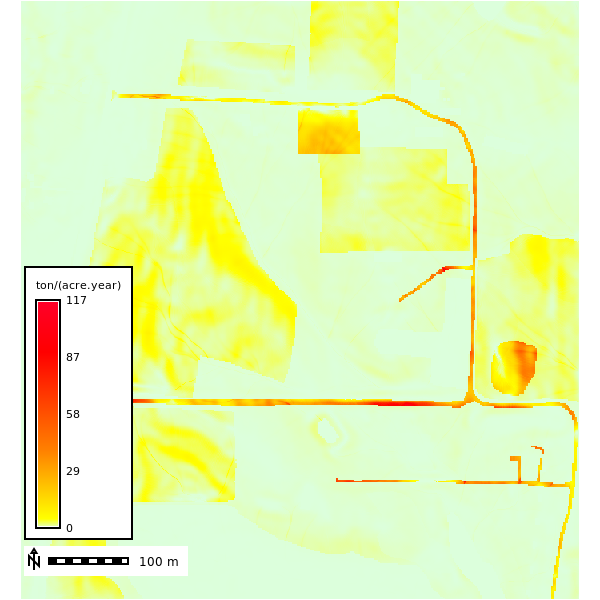

In [46]:
# Create Map instance
soillosgrow_map = gj.Map(height=600, width=600, use_region=True, filename="output/soillosgrow.png")

# Add raster layers
soillosgrow_map.d_rast(map="soillossgrow_1m")

# Add map properties
soillosgrow_map.d_legend(raster="soillossgrow_1m", at="12,50,6,10", flags="b")
soillosgrow_map.d_barscale(at=[4,9], flags="n")

# Display map
soillosgrow_map.show()

Calculate the univariate statistics.

In [47]:
%%bash
r.univar soillossgrow_1m

total null and non-null cells: 525000
total null cells: 2896

Of the non-null cells:
----------------------
n: 522104
minimum: 0
maximum: 116.602
range: 116.602
mean: 1.70178
mean of absolute values: 1.70178
standard deviation: 5.15801
variance: 26.605
variation coefficient: 303.095 %
sum: 888506.609975175


   2%   5%   8%  11%  14%  17%  20%  23%  26%  29%  32%  35%  38%  41%  44%  47%  50%  53%  56%  59%  62%  65%  68%  71%  74%  77%  80%  83%  86%  89%  92%  95%  98% 100%
 100%


## Compute new DEM with erosion carved-in

In [48]:
%%bash

r.mapcalc "elev_erodedb_1m = elev_lid792_1m-(soillossbare_1m/100.)"

Display `elev_erodedb_1m` in 3D and drape over `soillossbare_1m` as color.
To view it in 3D switch off everything except `elev_erodedb_1m`.
Drape `soillossbare_1m` as color and don't forget to set fine resolution to 1.
Use lighting from SW, z-exag at least 2.0

In [ ]:
elev_erodedb_1m_3dmap = gj.Map3D(filename="output/elev_erodedb_1m.png")
# Full list of options m.nviz.image
# https://grass.osgeo.org/grass83/manuals/m.nviz.image.html
elev_erodedb_1m_3dmap.render(
    elevation_map="elev_erodedb_1m",
    color_map="soillossbare_1m",
    perspective=20,
    height=1300,
    zexag=2,
    light_position="-1,-1,0.5",
    fringe=['ne','nw','sw','se'],
    arrow_position=[100,50],
)
elev_erodedb_1m_3dmap.overlay.d_legend(
    raster="soillossbare_1m",
    at=(40, 80, 85, 90),
    title_fontsize=12,
    fontsize=12
)

elev_erodedb_1m_3dmap.overlay.d_barscale(at=(60, 97, 87, 92))

elev_erodedb_1m_3dmap.show()

## Compute net erosion/deposition maps (using USPED)

Compute net erosion/deposition maps as divergence of sediment flow (USPED).

First compute sediment flow

In [50]:
%%bash

r.mapcalc "sedflow_1m = 270. * soils_Kfactor * cfactorgrow_1m * flowacc_1m * sin(slope_1m)"
r.colors sedflow_1m raster=soillossbare_1m

Color table for raster map <sedflow_1m> set to 'soillossbare_1m'


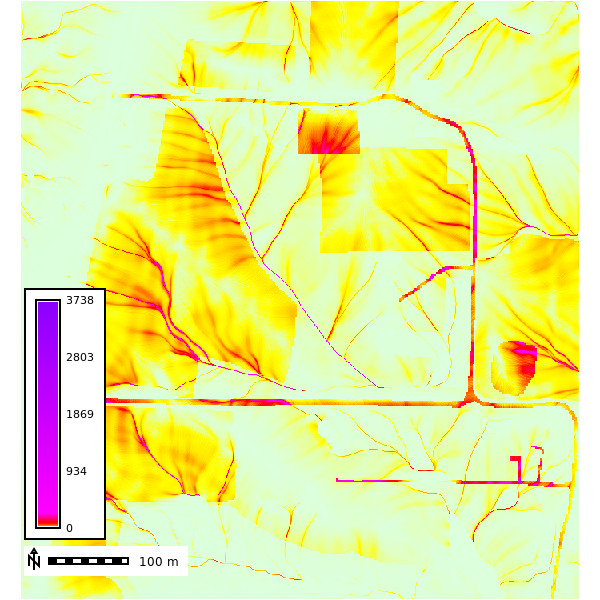

In [51]:
# Create Map instance
sedflow_1m_map = gj.Map(height=600, width=600, use_region=True, filename="output/sedflow_1m.png")

# Add raster layers
sedflow_1m_map.d_rast(map="sedflow_1m")

# Add map properties
sedflow_1m_map.d_legend(raster="sedflow_1m", at="12,50,6,10", flags="b")
sedflow_1m_map.d_barscale(at=[4,9], flags="n")

# Display map
sedflow_1m_map.show()

Now compute its components in x, y directions

In [52]:
%%bash

r.mapcalc "qsx = sedflow_1m * cos(aspect_1m)"
r.mapcalc "qsy = sedflow_1m * sin(aspect_1m)"

Compute change of sediment flow in the x and y directions and then change in the direction of flow using divergence.

In [53]:
%%bash

r.slope.aspect elevation=qsx dx=qsx_dx
r.slope.aspect elevation=qsy dy=qsy_dy
r.mapcalc "erdep = qsx_dx + qsy_dy"
r.info -r erdep
r.colors erdep rules=inputs/erdep_color.txt

min=-1112.029
max=1233.677


   0%   3%   6%   9%  12%  15%  18%  21%  24%  27%  30%  33%  36%  39%  42%  45%  48%  51%  54%  57%  60%  63%  66%  69%  72%  75%  78%  81%  84%  87%  90%  93%  96%  99% 100%
E-W slope raster map <qsx_dx> complete
   0%   3%   6%   9%  12%  15%  18%  21%  24%  27%  30%  33%  36%  39%  42%  45%  48%  51%  54%  57%  60%  63%  66%  69%  72%  75%  78%  81%  84%  87%  90%  93%  96%  99% 100%
N-S slope raster map <qsy_dy> complete
Color table for raster map <erdep> set to 'inputs/erdep_color.txt'


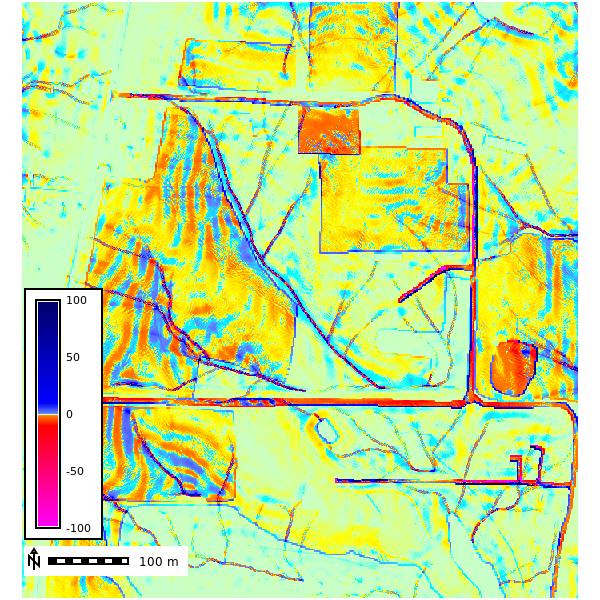

In [54]:
# Create Map instance
erdep_map = gj.Map(height=600, width=600, use_region=True, filename="output/erdep.png")

# Add raster layers
erdep_map.d_rast(map="erdep")

# Add map properties
erdep_map.d_legend(raster="erdep", at="12,50,6,10", flags="b", range="-100,100")
erdep_map.d_barscale(at=[4,9], flags="n")

# Display map
erdep_map.show()

<div class="alert alert-block alert-info">

### Task: Display elev_lid792_1m in 3D and drape over erdep as color (switch off all layers except for elev_lid792_1m).

In [ ]:
## Add your code here
erdep_3d_map = gj.Map3D(filename="output/erdep_3d_map.png")
# Full list of options m.nviz.image
# https://grass.osgeo.org/grass83/manuals/m.nviz.image.html
erdep_3d_map.render(
    elevation_map="elev_lid792_1m",
    color_map="erdep",
    perspective=20,
    height=3000,
    fringe=['ne','nw','sw','se'],
    arrow_position=[100,50],
)
erdep_3d_map.overlay.d_legend(
    raster="erdep",
    at=(40, 80, 85, 90),
    title_fontsize=12,
    fontsize=12
)

erdep_3d_map.overlay.d_barscale(at=(60, 97, 87, 92))

erdep_3d_map.show()

## Compute summary statistics

Use [r.recode](https://grass.osgeo.org/grass76/manuals/r.recode.html) to classify erosion/deposition and [r.category](https://grass.osgeo.org/grass76/manuals/r.category.html) to add labels (stable, high erosion, etc) to individual categories:

Example output:

```
[...]
| #| description         |  %  | hectares |  acres  |
|-4| severe erosion . . .| 0.19|  0.101300|  0.25031|
|-3| high erosion . . . .| 1.34|  0.701600|  1.73365|
|-2| moderate erosion . .| 3.89|  2.042600|  5.04726|
|-1| low erosion . . . . |19.74| 10.366000| 25.61438|
| 0| stable . . . . . . .|61.32| 32.192000| 79.54643|
| 1| low deposition . . .| 8.40|  4.407600| 10.89118|
| 2| moderate deposition | 2.49|  1.307500|  3.23083|
| 3| high deposition . . | 1.29|  0.676900|  1.67262|
| 4| severe deposition . | 0.24|  0.126100|  0.31159|
| *|no data. . . . . . . | 1.10|  0.578400|  1.42922|
|---------------------------------------------------|
|TOTAL                   |100.00| 52.500000|129.7275|
```

In [56]:
%%bash

r.recode erdep output=erdep_class rules=inputs/erdep_class.txt
r.category erdep_class rules=inputs/erdep_label.txt sep=:
r.report erdep_class unit=p,h,a

+-----------------------------------------------------------------------------+
|                         RASTER MAP CATEGORY REPORT                          |
|LOCATION: nc_spm_08_grass7                           Wed Apr 17 02:35:56 2024|
|-----------------------------------------------------------------------------|
|          north: 220750    east: 639000                                      |
|REGION    south: 220000    west: 638300                                      |
|          res:        1    res:       1                                      |
|-----------------------------------------------------------------------------|
|MASK: none                                                                   |
|-----------------------------------------------------------------------------|
|MAP: (untitled) (erdep_class in HW_7B_Flow_Modeling)                         |
|-----------------------------------------------------------------------------|
|             Category Information      

   0%   3%   6%   9%  12%  15%  18%  21%  24%  27%  30%  33%  36%  39%  42%  45%  48%  51%  54%  57%  60%  63%  66%  69%  72%  75%  78%  81%  84%  87%  90%  93%  96%  99% 100%
   0%   3%   6%   9%  12%  15%  18%  21%  24%  27%  30%  33%  36%  39%  42%  45%  48%  51%  54%  57%  60%  63%  66%  69%  72%  75%  78%  81%  84%  87%  90%  93%  96%  99% 100%


<div class="alert alert-block alert-info">

### Question: What are the advantages, disadvantages and risks of classifying erosion/deposition data into categories?

Classifying into categories is helpful for summarizing the data and getting an overall big picture look at what the data is presenting. For example, looking at the category report, you can get an idea of which categories have the highest and lowest percentage of cover. However, this comes with disadvantages, as this can result in the loss of data, or certain features becoming hidden.

Compute univariate statistics:

In [57]:
%%bash
r.univar erdep

total null and non-null cells: 525000
total null cells: 5784

Of the non-null cells:
----------------------
n: 519216
minimum: -1112.03
maximum: 1233.68
range: 2345.71
mean: -0.00457319
mean of absolute values: 1.13869
standard deviation: 11.1154
variance: 123.552
variation coefficient: -243055 %
sum: -2374.47381368889


   2%   5%   8%  11%  14%  17%  20%  23%  26%  29%  32%  35%  38%  41%  44%  47%  50%  53%  56%  59%  62%  65%  68%  71%  74%  77%  80%  83%  86%  89%  92%  95%  98% 100%
 100%


> Look for line with sum: **-2374.473814**

The units are tons/(acre.year), but our cells are 1 m2. Therefore we have to divide by 4046 (1 acre = 4046 m2) to get total ton per year transported from the watershed. You can use the Python shell in the Python tab do the division.